<a href="https://colab.research.google.com/github/Anushkapandey01/Exploratory-Data-Analysis/blob/main/hotel_bookings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel-Bookings- Exploratory Data Analysis and Visualization

- This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.
- Can be useful to analyse the booking surge month, week days.
- Booking cancellation patterns etc.

## Download the Data

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/jessemostipak/hotel-booking-demand'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anushkapandey
Your Kaggle Key: ··········


100%|██████████| 1.25M/1.25M [00:00<00:00, 97.6MB/s]

In [ ]:
data_filename = './hotel-booking-demand/hotel_bookings.csv'

## Terminologies
- lead_time:
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- market_segment: market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel:
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- assigned_room_type:
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to non-availability
- booking_changes:
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- agent:
ID of the travel agency that made the booking
- company:
ID of the company/entity that made the booking or responsible for paying the booking.
- adr:
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- total_of_special_requests:
Number of special requests made by the customer (e.g. twin bed or high floor) 


## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# I'll use pandas to check the columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Let's check column data types, number of non- null values in each column etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# I'll check if there are any missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Apparently children, country, agent and company columns have some missing values. Let's replace the missing values with appropriate values.
# Assumptions:
# If children column has no available value, most likely none were there.
# If agent and company column has missing value, probably none were used for booking and was done privately
correction = {'children':0, 'country':'Unknown', 'agent':0, 'company':0}
df_cleaned = df.fillna(correction)

# check for rows with 0 guests(no adults, children or babies)
# I'll drop these rows
zero_guests = list(df_cleaned.loc[df_cleaned["adults"]
                   + df_cleaned["children"]
                   + df_cleaned["babies"]==0].index)
df_cleaned.drop(df_cleaned.index[zero_guests], inplace=True)

# It was mentioned in the dataset details page that Undefined and SC both means no meal
# I'll replace Undefined values with SC for better understanding
df_cleaned["meal"].replace("Undefined", "SC", inplace=True)



In [ ]:
# How much data is remaining
df_cleaned.shape

(119210, 32)

## Ask and answer questions

In [ ]:
# Separate data for actual visitors (i.e no cancellation)
visitors_data = df_cleaned.loc[(df_cleaned["is_canceled"] == 0)]

### Which are the most busy month?

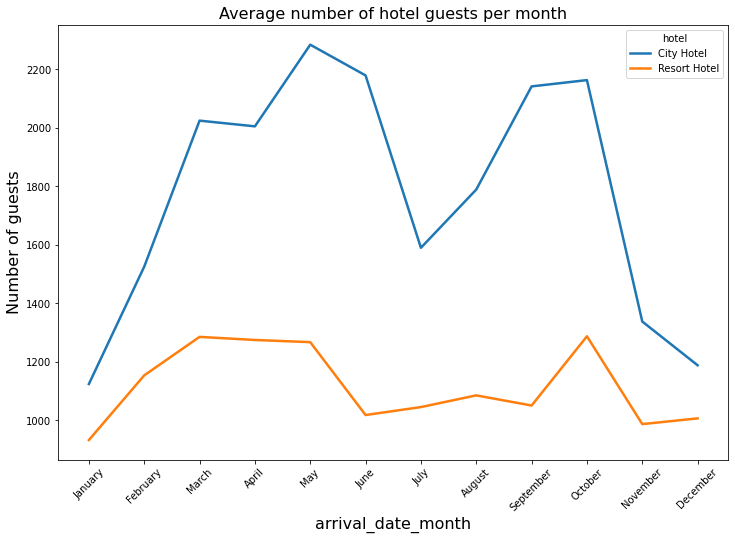

In [ ]:
# create a dataframe for monthly guests of both hotel type
monthly_guests = visitors_data.groupby(['arrival_date_month', 'hotel'])[['hotel']].count()
monthly_guests.rename(columns = {'hotel':'guests'}, inplace = True)
monthly_guests.reset_index(inplace=True)
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
monthly_guests["arrival_date_month"] = pd.Categorical(monthly_guests["arrival_date_month"], categories=ordered_months, ordered=True)

# We've Dataset for bookings between 1 July 2015 to 31 August 2017
# Since July and August data are for 3 years while the other months for 2 years.
# Let's Normalize the data for a fair analysis:
monthly_guests.loc[(monthly_guests["arrival_date_month"] == "July") | (monthly_guests["arrival_date_month"] == "August"),
                    "guests"] /= 3
monthly_guests.loc[~((monthly_guests["arrival_date_month"] == "July") | (monthly_guests["arrival_date_month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="guests", hue="hotel", data=monthly_guests, 
             hue_order = ["City Hotel", "Resort Hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("arrival_date_month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

### Bookings by Market Segment

In [ ]:
# total bookings per market segment (including canceled) 
segments= df_cleaned["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

### Guests by country

In [ ]:
# get number of acutal guests by country
guest_country = pd.DataFrame(df_cleaned.loc[df_cleaned["is_canceled"] == 0]["country"].value_counts())
# since the guest count column has the name 'country' let's rename it
guest_country.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = guest_country["Number of Guests"].sum()
guest_country["Guests in %"] = round(guest_country["Number of Guests"] / total_guests * 100, 2)
guest_country["country"] = guest_country.index
# we could have reset the index alternatively to avoid creating an extra column

# display on map
guest_map = px.choropleth(guest_country,
                    locations=guest_country.index,
                    color=guest_country["Guests in %"], 
                    hover_name=guest_country.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Country of guests")
guest_map.show()

In [ ]:
# pie plot to compare number of guests from each country
fig = px.pie(guest_country,
             values="Number of Guests",
             names="country",
             title="Country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

### Average cost of hotel room per night per person
##### There are a lot of factors involved in the room pricing like room booked, meal type, special requests etc.
##### We'll consider the average daily rate provided, number of adults and children for our calculation

In [ ]:
# According to the publication (https://www.sciencedirect.com/science/article/pii/S2352340918315191)
# we know both City and Resort hotels are located in Portugal. Therefore, we'll assume the prices in Euro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



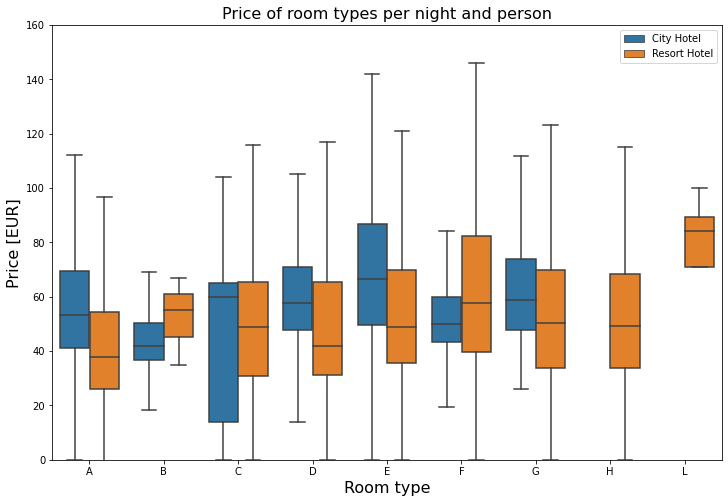

In [ ]:
# Let's calculate room price per night per person (adr_pp), excluding babies:
visitors_data["adr_pp"] = visitors_data["adr"] / (visitors_data["adults"] + visitors_data["children"])
room_prices = visitors_data[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

In [ ]:
# We can observe the average price per room per person and its standard deviation from the above boxplot
# The prices vary differently based on the room type

### Variation of price per night over the year

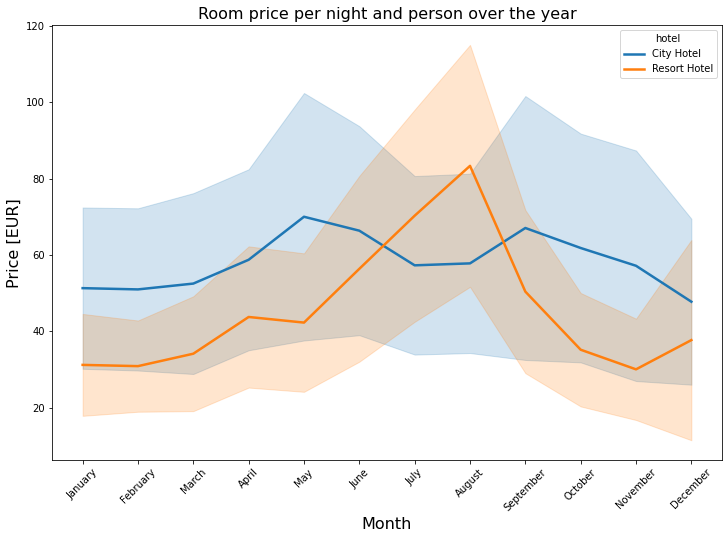

In [ ]:
# I'll sort the data based on the arrival month of the guest to study the prices through different months 
room_prices_mothly = visitors_data[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

In [ ]:
# City hotels are cheaper during summer and most expensive during spring and autumn
# Resort hotels prices vary a lot and are very high during summer

### Price per night (ADR) and person based on booking and room.

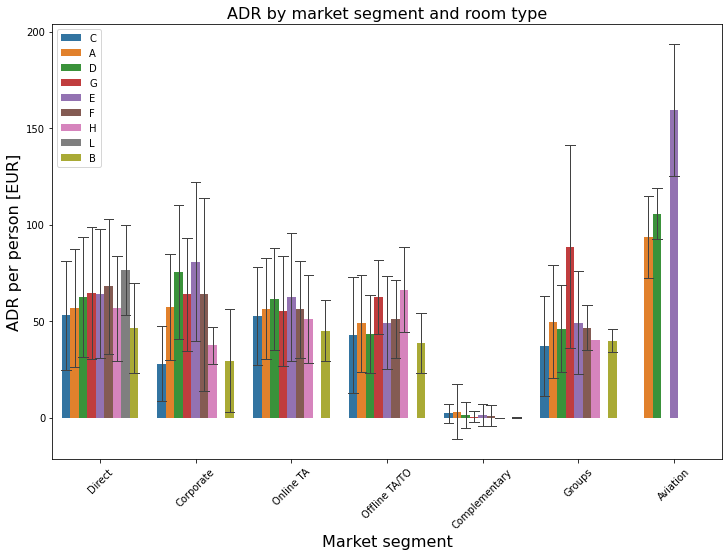

In [ ]:

# Illustration using barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=visitors_data,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()


In [ ]:
# On average, groups get the best prices and Airlines pay approximately twice as much.

### What are possible reasons for the high prices paid by Airlines?

In [ ]:
# Summarize Relevant data:
Airline_data = visitors_data.loc[visitors_data["market_segment"]== "Aviation"][["is_canceled",
                                                                                "adults",
                                                                                "lead_time",
                                                                                "adr_pp"]].describe()

Non_Airline_data = visitors_data.loc[visitors_data["market_segment"]!= "Aviation"][["is_canceled",
                                                                                    "adults",
                                                                                    "lead_time",
                                                                                    "adr_pp"]].describe()


In [ ]:
Airline_data

,is_canceled,adults,lead_time,adr_pp
count,183.0,183.000000,183.000000,183.000000
mean,0.0,1.016393,4.174863,99.640328
std,0.0,0.127331,4.061616,20.443214
min,0.0,1.000000,0.000000,0.000000
25%,0.0,1.000000,1.000000,95.000000
50%,0.0,1.000000,3.000000,95.000000
75%,0.0,1.000000,6.000000,110.000000
max,0.0,2.000000,21.000000,193.500000


In [ ]:
Non_Airline_data

,is_canceled,adults,lead_time,adr_pp
count,74828.0,74828.000000,74828.000000,74828.000000
mean,0.0,1.835516,80.267667,54.618760
std,0.0,0.503101,91.171518,28.094738
min,0.0,0.000000,0.000000,-3.190000
25%,0.0,2.000000,9.000000,37.400000
50%,0.0,2.000000,46.000000,49.500000
75%,0.0,2.000000,125.000000,66.150000
max,0.0,4.000000,737.000000,510.000000


In [ ]:
# Lead time for bookings from Aviation is very short: Mean 4 days vs. 104 days for other bookings.
# Airlines NEED a place for their crews to stay.
# Airline personel usually gets one room per person - more total rooms required compared to families.

### Booking Cancelations

In [ ]:
total_cancelations = df_cleaned["is_canceled"].sum()
# Resort hotel cancelations
rh_cancelations = df_cleaned.loc[df_cleaned["hotel"] == "Resort Hotel"]["is_canceled"].sum()
# City hotel cancelations
ch_cancelations = df_cleaned.loc[df_cleaned["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / df_cleaned.shape[0] * 100
rh_rel_cancel = rh_cancelations / df_cleaned.loc[df_cleaned["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / df_cleaned.loc[df_cleaned["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (28 %)
City hotel bookings canceled: 33,079 (42 %)


### Cancelations comparison monthwise

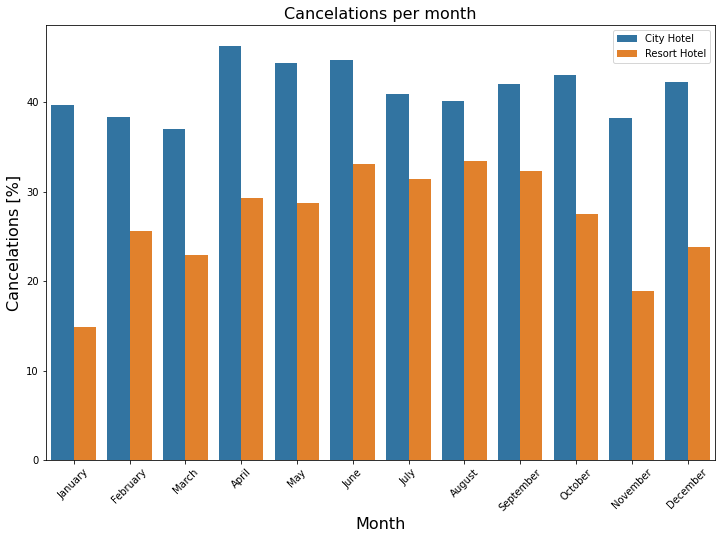

In [ ]:
# Create a DateFrame with the relevant data:
res_book_per_month = df_cleaned.loc[(df_cleaned["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df_cleaned.loc[(df_cleaned["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df_cleaned.loc[(df_cleaned["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df_cleaned.loc[(df_cleaned["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

In [ ]:
# For the City hotel the relative number of cancelations is around 40 % throughout the year.
# For the Resort hotel it is highest in the summer and lowest during the winter.

### How long do people stay at the hotels?

In [ ]:
# Separate resort and city hotel data
rh = df_cleaned.loc[(df_cleaned["hotel"] == "Resort Hotel") & (df_cleaned["is_canceled"] == 0)]
ch = df_cleaned.loc[(df_cleaned["hotel"] == "City Hotel") & (df_cleaned["is_canceled"] == 0)]

In [ ]:
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



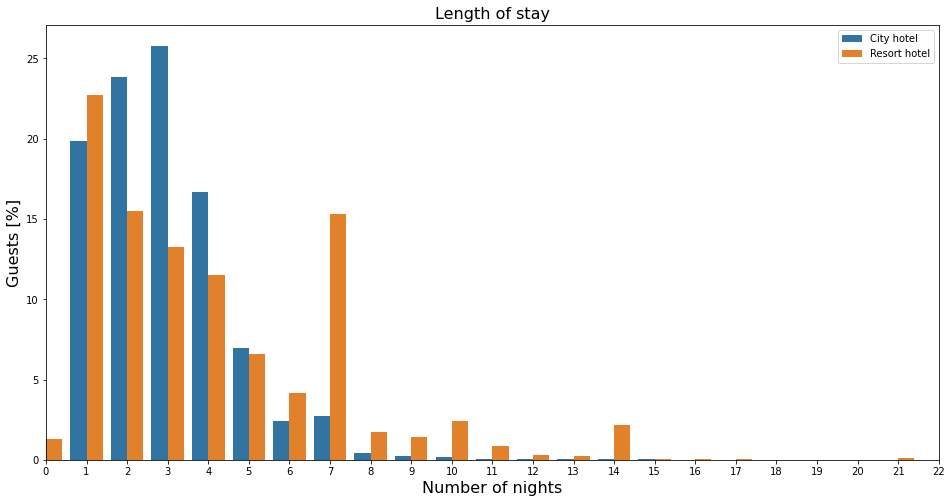

In [ ]:
#bar plot:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [ ]:
#Guests generally book 1-4 nights in the city hotel
#For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.